# <center> Machine Learning </center>
Machine learning is a branch of Artificial Intelligence (AI) in which computers and machines are taught to learn and improve from experience without being explicitly programmed, using data, statistical models and algorithms.

Artificial Intelligence, simply put, is the simulation of human intelligence processes by machines and computer systems.

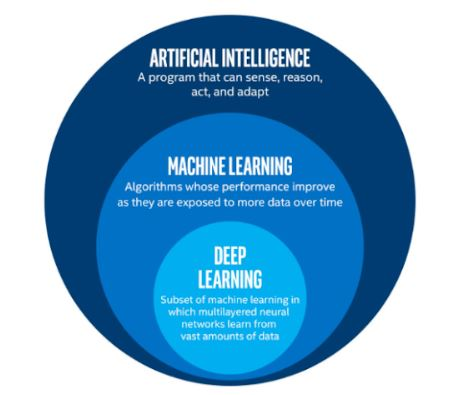
> Image Source: https://builtin.com/machine-learning/what-is-deep-learning

###  Machine Learning Life Cycle 

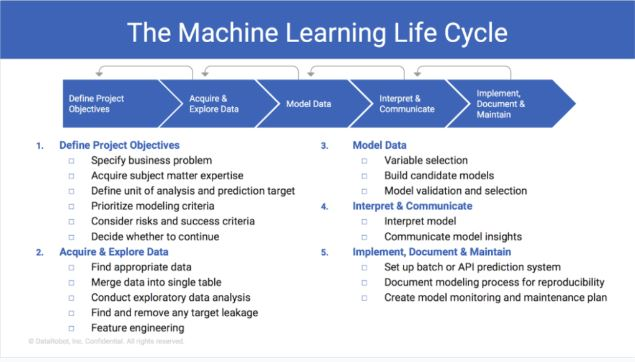

> Image source: https://www.datarobot.com/wiki/machine-learning-life-cycle/


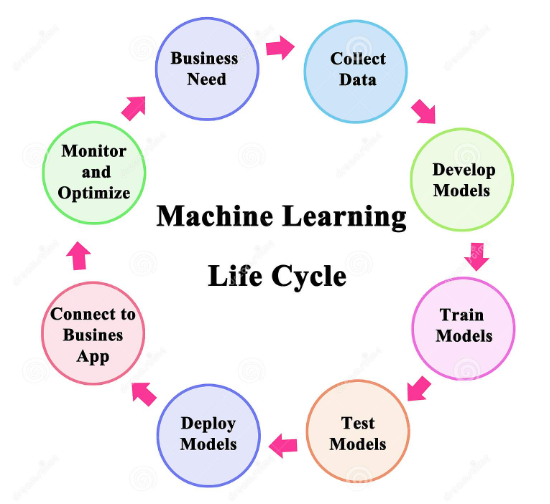

> Image source: https://www.dreamstime.com/stages-machine-learning-lifecycle-image213239974

## <center> Machine Learning Methods </center>
**Supervised Learning**: Supervised machine learning algorithms apply what has been learned in the past to new data using labeled examples to predict future events.

**Unsupervised Learning**: Unsupervised learning is used against data that has no historical labels. The system is not told the "correct answer".

##### Supervised Learning
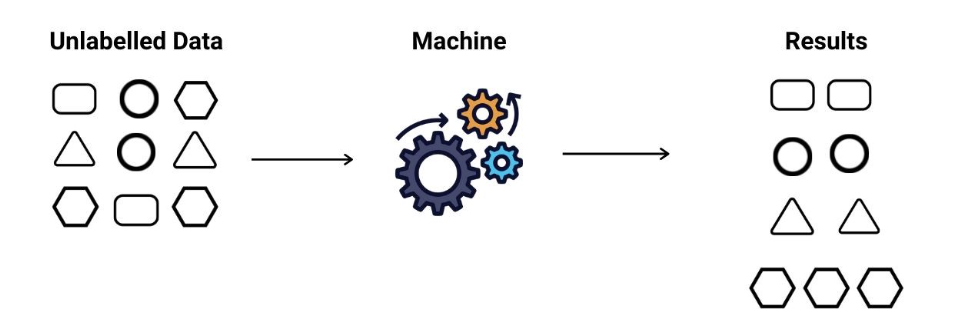
> Image source: https://www.enjoyalgorithms.com/blogs/supervised-unsupervised-and-semisupervised-learning


##### Unsupervised Learning
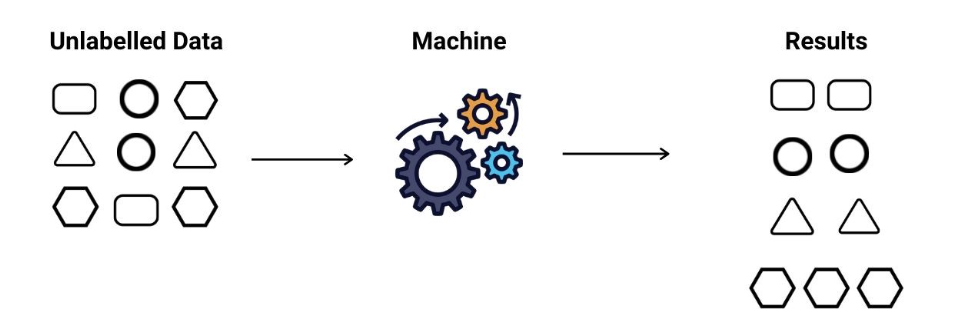
> Image source: https://www.enjoyalgorithms.com/blogs/supervised-unsupervised-and-semisupervised-learning

### Supervised Learning Examples

Recommender systems, Image classification, Time Series prediction, Fraud detection, Credit risk prediction, Score prediction

### Algorithms
* Decision Trees (Regression/Classification)
* Linear Regression (Regression)
* Logistic Regression (Classification)
* Random Forest (Regression/Classification)
* Naive Bayes 
* K Nearest Neighbours
* Support Vector Machine


### Unsupervised Learning Examples
Customer segmentation

### Algorithms
* K-Means Clustering
* DBSCSN Clustering
* Hierarchical Clustering
* Principal Component Analysis
* Gaussian Mixture

In [ ]:
# Import Data
# EDA 
# Data pre-processing - Data wrangling & Cleaning
# Feature Engineering
# Train your model
# Test/Evaluate your model
# Tune model hyperparamters
# Evaluate
# Select the best model

### Predict Lagos House Prices Using Regression

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
lagos_houses = pd.read_csv('lagos_house_prices_raw.csv')
lagos_houses.head()

NameError: name 'pd' is not defined

In [ ]:
lagos_houses = pd.read_csv(r'C:\Users\Chinazam\Downloads\lagos_house_prices_raw.csv')
lagos_houses.head()

In [4]:
lagos_houses.shape

(5336, 15)

In [5]:
# info on our columns
lagos_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 15 columns):
location          5336 non-null object
bed               5336 non-null int64
bath              5336 non-null int64
toilet            5336 non-null int64
price             5336 non-null float64
Property_Type     5336 non-null object
Parking_Space     5336 non-null int64
Security          5336 non-null int64
Electricity       5336 non-null int64
Furnished         5336 non-null int64
Security_Doors    5336 non-null int64
CCTV              5336 non-null int64
Pool              5336 non-null int64
Gym               5336 non-null int64
BQ                5336 non-null int64
dtypes: float64(1), int64(12), object(2)
memory usage: 625.4+ KB


In [6]:
# descriptive statistics
lagos_houses.describe()

,bed,bath,toilet,price,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
count,5336.000000,5336.000000,5336.000000,5.336000e+03,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000
mean,1.393178,1.447901,1.637181,6.455669e+05,0.122001,0.104573,0.023051,0.020240,0.000937,0.006372,0.005997,0.001312,0.013306
std,0.773157,0.793780,0.965145,4.693053e+05,0.327318,0.306031,0.150079,0.140833,0.030599,0.079576,0.077215,0.036199,0.114592
min,1.000000,1.000000,1.000000,1.500000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.500000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,5.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,2.000000,8.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,2.450000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


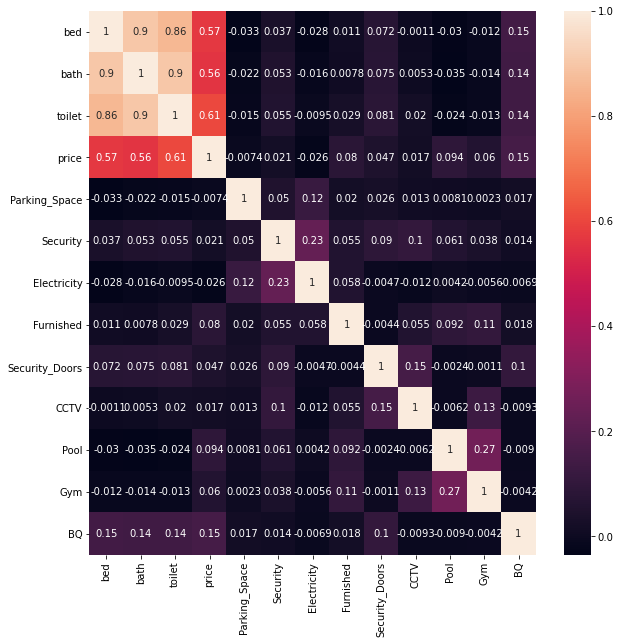

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(lagos_houses.corr(), annot=True)

In [8]:
lagos_houses.isnull().sum()

location          0
bed               0
bath              0
toilet            0
price             0
Property_Type     0
Parking_Space     0
Security          0
Electricity       0
Furnished         0
Security_Doors    0
CCTV              0
Pool              0
Gym               0
BQ                0
dtype: int64

# Select target we want to predict. Price is the target


In [10]:

y = lagos_houses.price

# another way of selecting a column
# y = lagos_houses['price']

In [11]:
# visualise our target

y.head()

0    700000.0
1    700000.0
2    650000.0
3    450000.0
4    800000.0
Name: price, dtype: float64

# Feature Selection

Feature selection is where you select the features from your dataset you want to use in the prediction

We usually assign our training data X

In [56]:
lagos_houses.columns

Index(['location', 'bed', 'bath', 'toilet', 'price', 'Property_Type',
       'Parking_Space', 'Security', 'Electricity', 'Furnished',
       'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ'],
      dtype='object')

In [59]:
feature_columns = ['bed', 'bath', 'toilet',
       'Parking_Space', 'Security', 'Electricity', 'Furnished',
       'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ']

feature_columns

['bed',
 'bath',
 'toilet',
 'Parking_Space',
 'Security',
 'Electricity',
 'Furnished',
 'Security_Doors',
 'CCTV',
 'Pool',
 'Gym',
 'BQ']

In [61]:
X = lagos_houses[feature_columns]
X.head()

,bed,bath,toilet,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,1,1,2,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,0,0
2,1,1,2,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,0,0
4,3,3,4,0,1,0,0,0,0,0,0,0


In [62]:
# Let's build our first model

In [63]:
# import the model we want to use from scikit learn

from sklearn.tree import DecisionTreeRegressor



In [84]:
# initialise your model or create an instance of your model

lagos_model = DecisionTreeRegressor(random_state=42)

In [86]:
# fit your model to your training data, this is also called training a model

lagos_model.fit(X,y)

DecisionTreeRegressor()

In [96]:
# make a prediction on the house prices

pred = lagos_model.predict(X)
print(pred[:50])

[ 714471.74447174  714471.74447174  714471.74447174  460478.95208071
 1477500.          914074.07407407  471029.94011976  626101.69491525
  714471.74447174  714471.74447174  460478.95208071  460478.95208071
  460478.95208071 1097443.18181818  416666.66666667  460478.95208071
  626101.69491525  935714.28571429 1189333.33333333  471029.94011976
  460478.95208071  365361.99095023  460478.95208071  714471.74447174
  626101.69491525  460478.95208071  782933.88429752  626101.69491525
  714471.74447174  714471.74447174 1321643.83561644  460478.95208071
  880303.03030303  782933.88429752  365361.99095023  616666.66666667
  460478.95208071  365361.99095023  460478.95208071  460478.95208071
  714471.74447174  626101.69491525  460478.95208071  460478.95208071
  850000.          594599.44444444  895454.54545455  460478.95208071
  460478.95208071  460478.95208071]


In [ ]:
# compare the actual or ground truth with predicted - in this case the predicted prices

In [97]:
print('Actual prices:', y.head().tolist())
print('Predicted prices:', pred[:5])

Actual prices: [700000.0, 700000.0, 650000.0, 450000.0, 800000.0]
Predicted prices: [ 714471.74447174  714471.74447174  714471.74447174  460478.95208071
 1477500.        ]


In [ ]:

# To evaluate our model, we use errors to do so

# MAE - mean absolute error
# MSE - mean squared error
# RMSE - root mean squared error

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y, pred)
mse = mean_squared_error(y, pred)
rmse = np.sqrt(mse)

print(mae)
print(mse)
print(rmse)

239587.33686843375
121988805608.65668
349268.9588392542


In [ ]:
# mae refers to the average difference between an actual house price and predicted house price
# it entails that on average, the difference between my actual house price and predicted price is N240,000

In [ ]:
# validation (train and test split)
# check with another algorithm - we can try random forest
# overfitting and underfitting 

### Validation

In [99]:
# carry out a train-test split

from sklearn.model_selection import train_test_split

In [100]:
# split your data into 70:30 ratio
# common ratios are 70:30, 60:40, 80:20

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [101]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')



X_train: (3735, 12)
X_test: (1601, 12)
y_train: (3735,)
y_test: (1601,)


In [104]:
# retrain the model


lagos_model.fit(X_train, y_train)

# let us predict on the test data

pred2 = lagos_model.predict(X_test)

In [105]:
# display and compare

print(y_test.head().tolist())
print(pred2[:5])



[2200000.0, 2000000.0, 1500000.0, 200000.0, 250000.0]
[1764285.71428571 1057264.95726496 1280100.          476057.14285714
  452708.33333333]


In [106]:
mae2 = mean_absolute_error(y_test, pred2)

print('Before splitting', mae)
print('After splitting', mae2)

Before splitting 239587.33686843375
After splitting 253907.3335608567


In [ ]:
## Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestRegressor

lagos_RF_model = RandomForestRegressor()

In [108]:
# train the model
lagos_RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [109]:
# make a prediction

pred_RF = lagos_RF_model.predict(X_test)


In [110]:
print(y_test.head().tolist())
print(pred_RF[:5])

[2200000.0, 2000000.0, 1500000.0, 200000.0, 250000.0]
[1756703.56558814 1057907.05841643 1270421.11980156  474297.85121398
  447526.02684057]


In [112]:
#  evaluate 

mae_RF = mean_absolute_error(y_test, pred_RF)

print(f'Decision tree {mae}')
print(f'Decision tree after splitting {mae2}')
print(f'Random Forest {mae_RF}')

Decision tree 239587.33686843375
Decision tree after splitting 253907.3335608567
Random Forest 252238.94686091057


# Writing Assignments

**1 page summary expected**. 2 pages max

Arial 12 Microsoft Word.

Publish on **Medium.com** by Friday.

* Decision Tree (assumptions, advantages, disadvantages, applications) - Unassigned
* Random Forest (assumptions, advantages, disadvantages, applications) - Unassigned
* Ensembling in Machine Learning - Unassigned
* KMeans (assumptions, advantages, disadvantages, applications) - Unassigned
* Logistic Regression -- Unassigned
* Naive Bayes (assumptions, advantages, disadvantages, applications) - Unassigned
* Support Vector Machines (assumptions, advantages, disadvantages, applications) -- Unassigned
* Overfitting vs Underfitting -- Unassigned
* Linear Regression (assumptions, advantages, disadvantages, applications) - Unassigned
* Ethical AI (talk about preventing human bias, discrimination, etc) -- Unassigned
* Machine Learning Model Evaluation - Unassigned
* ML Model Deployment (Talk about platforms available, ease of use, etc) - Unassigned
* Feature Importances (talk about what it means to an ML model...) -- Unassigned
* Model drift - Unassigned
* Bias - Variance Tradeoff (classify popular models as high/low variance, high/low bias) - Unassigned
* Variance Inflation Factor (talk about application to linear models) - Unassigned
* Feature Selection Methods - Unassigned
* Principal Component Analysis (also talk about how it's not a feature selection method) - Unassigned
* Model Intepretability - Unassigned
* Feed Forward Neural Networks - Unassigned


And lots more